In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
d = 2
n= 10000
lr = 0.001
noise = "lognormal"
c = 1
son = loss.RosenBrock(d=d,noise_type=noise,E_var=1.75)
RV = RV_SGDAve.RVSGDByW(model_opt=son,c=1,n=n,lr=lr)

In [3]:
k = 5

rng = np.random.default_rng()
# w_init = rng.uniform(-c,c,size=d)
w_init = np.array([0,2])

w , _= RV.learn(w_init=w_init,k=k)

In [4]:

w

array([0.68265279, 0.51793394])

In [5]:
wtr, ftr = RV.transition(k=k,w_init=w_init)

(1000, 5, 2)


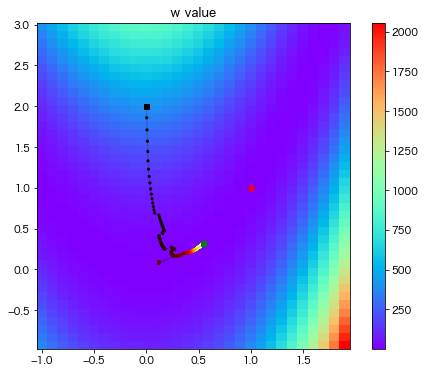

In [6]:

plot_set.w_value_2d_heatmap(f=son,w_store=wtr,_t_max=n)

In [7]:

_, result = RV.many_trails(trial_num=100,max_k=10,w_init=w_init)

  0%|          | 0/100 [00:00<?, ?it/s]

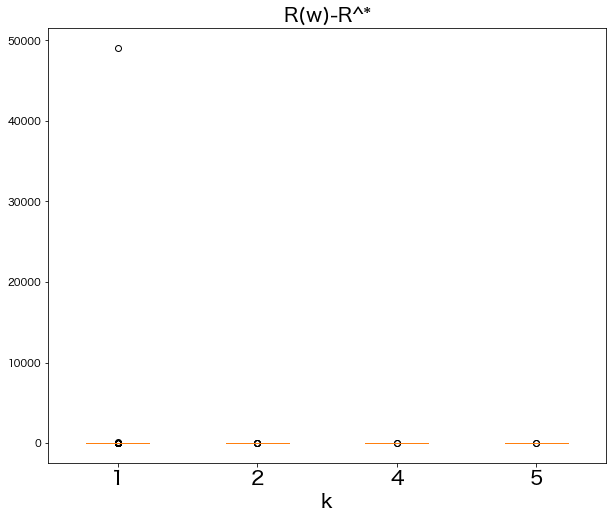

In [8]:
k_list = [0,1,3,4]
k_string = ["1","2","4","5"]
title = ""
plot_set.box_plot_k(result, k_list, k_string, title)

In [9]:
pd.DataFrame(result[:, k_list],columns=k_string).describe()

,1,2,4,5
count,100.000000,100.000000,100.000000,100.000000
mean,493.666150,0.082045,0.045074,0.039612
std,4909.892471,0.077186,0.020386,0.018870
min,0.018178,0.012504,0.005539,0.004283
25%,0.097818,0.038808,0.029472,0.025158
50%,0.209919,0.060070,0.045779,0.038063
75%,0.858222,0.105722,0.055739,0.049616
max,49101.521084,0.627457,0.107084,0.095079
